In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_perth = pd.read_csv('WEC_Perth_49.csv')
df_perth.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77


In [7]:
df_perth.describe()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
count,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,...,36043.000000,36043.00000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,3.604300e+04
mean,366.597060,18.709550,426.314033,51.085762,477.295590,57.846020,497.150488,73.323178,684.309548,44.012247,...,93678.772248,96530.68484,96666.293181,97007.214249,98466.265281,98106.278501,97462.663041,96134.920454,0.833849,3.938246e+06
std,307.911246,44.043295,265.781316,90.151852,270.322011,42.143917,279.631344,51.140816,237.862684,59.242702,...,7401.226140,6709.53446,7020.690028,4829.877255,4978.194259,4263.508074,3134.420742,3889.098339,0.026052,1.226171e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,52516.130000,56391.97000,53877.360000,53050.330000,55401.380000,63028.260000,61717.310000,47257.430000,0.720000,3.388944e+06
25%,65.770000,0.000000,200.000000,0.000000,289.950000,50.000000,300.000000,50.000000,600.000000,0.000000,...,88177.210000,94648.08000,96932.520000,97612.350000,97629.940000,97154.630000,96869.740000,96319.550000,0.810000,3.847335e+06
50%,250.000000,0.000000,346.090000,37.520000,400.000000,74.820000,500.000000,100.000000,700.000000,0.080000,...,93694.540000,98729.91000,99269.310000,98857.150000,100423.930000,99805.920000,98710.730000,96543.090000,0.830000,3.931541e+06
75%,600.000000,0.000000,745.980000,37.900000,689.800000,74.960000,632.750000,112.150000,850.000000,50.000000,...,100997.520000,100622.52000,100282.360000,99156.130000,101370.970000,100955.350000,99064.495000,97036.300000,0.860000,4.063623e+06
max,1000.000000,885.590000,1000.000000,939.260000,1000.000000,990.000000,1000.000000,990.000000,1000.000000,919.590000,...,110945.940000,109400.43000,114194.520000,106702.150000,104751.350000,102892.110000,102275.480000,101876.140000,0.880000,4.177659e+06


In [8]:
df_perth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36043 entries, 0 to 36042
Columns: 149 entries, X1 to Total_Power
dtypes: float64(149)
memory usage: 41.0 MB


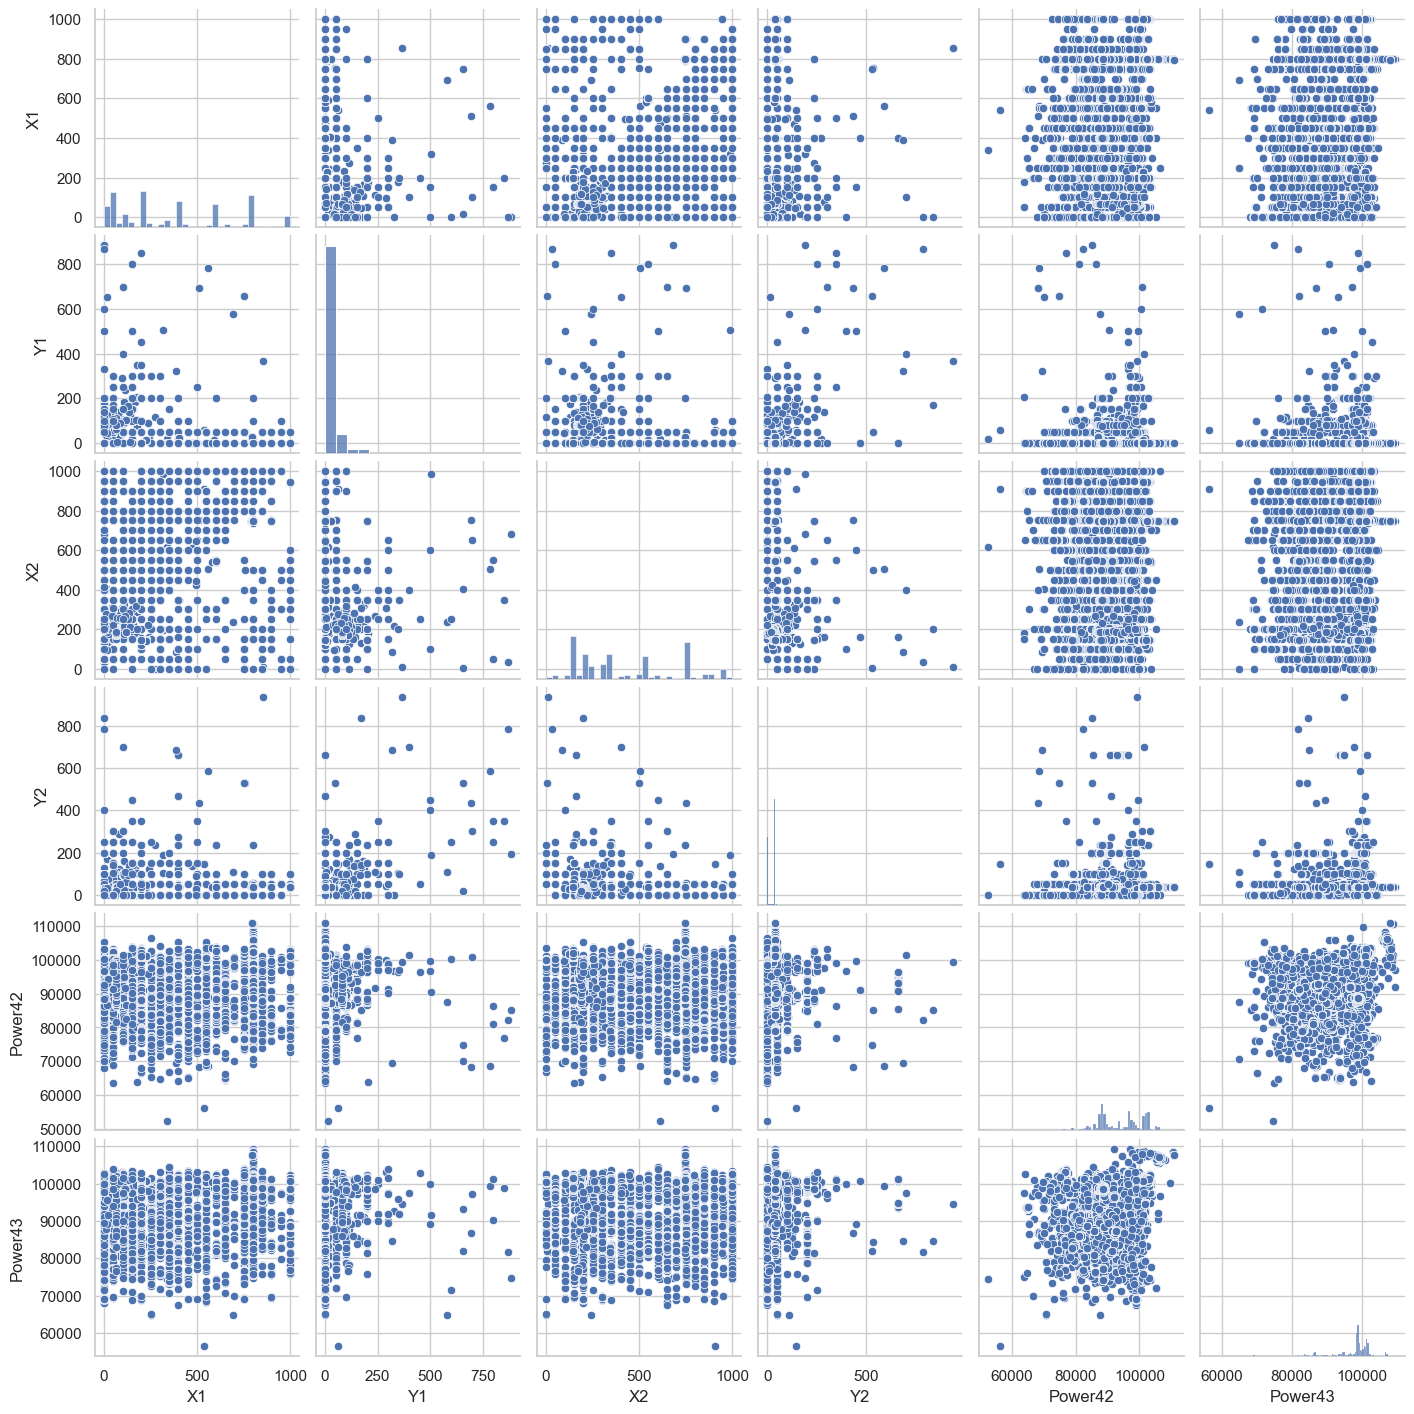

In [10]:
sns.set(style='whitegrid', context = 'notebook')
cols = ['X1', 'Y1', 'X2', 'Y2', 'Power42', 'Power43']
sns.pairplot(df_perth[cols], height=2.4)
plt.show()

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomTreesEmbedding
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, f1_score

In [13]:
X= df_perth.drop('Total_Power', axis=1)
y = df_perth['Total_Power']

In [14]:
#Se divide el conjunto de datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [23]:
#Se crea un pipeline con StandardSclaer, PCA y RandomForestRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('regressor', RandomForestRegressor())
])

In [27]:
#Se definen los hiperparametros
param_grid = {
    'regressor__n_estimators': [10, 50, 100],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt'],
}

In [28]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [29]:
#Se entrena el modelo
grid_search.fit(X_train, y_train)

c:\Users\aleja\OneDrive\Escritorio\Dev-DS\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aleja\OneDrive\Escritorio\Dev-DS\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aleja\OneDrive\Escritorio\Dev-DS\env\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aleja\OneDrive\Escritorio\Dev-DS\en

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=10)),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__max_features': ['auto', 'sqrt'],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [30]:
#Se muestran los mejores hiperparametros
print('Mejores hiperparámetros:', grid_search.best_params_)

Mejores hiperparámetros: {'regressor__max_depth': 30, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}


In [31]:
#Se obtienen las predicciones
y_pred = grid_search.predict(X_test)

In [32]:
#Se evalua el modelo en función de métricas (MSE, R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Se imprimen las métricas
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 706619317.7199333
R2: 0.9529986260671375
